In [71]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Plotting functionality

In [91]:
# Plotting

class SignalPlotter:
    @staticmethod
    def plot_time_domain(samples, title='Time Domain Signal', yLable='x[n]', xLable='n'):
        """Plot signal in the time domain."""
        plt.figure()
        plt.stem(np.arange(len(samples)), samples)
        plt.title(title)
        plt.xlabel(xLable)
        plt.ylabel(yLable)
        plt.grid()
        plt.show()

    @staticmethod
    def plot_dft(dft, title='DFT Magnitude and Phase'):
        """Plot magnitude and phase of DFT."""
        N = len(dft)
        freq = np.arange(N)
        magnitude = np.abs(dft)
        phase = np.angle(dft)
        plt.figure()
        plt.subplot(2, 1, 1)
        plt.stem(freq, magnitude)
        plt.title(title + ' - Magnitude')
        plt.xlabel('k')
        plt.ylabel('|X[k]|')
        plt.subplot(2, 1, 2)
        plt.stem(freq, phase)
        plt.title(title + ' - Phase')
        plt.xlabel('k')
        plt.ylabel('∠X[k]')
        plt.tight_layout()
        plt.show()

    @staticmethod
    def plot_dtft(omega, dtft, title='DTFT Magnitude and Phase'):
        """Plot magnitude and phase of DTFT."""
        magnitude = np.abs(dtft)
        phase = np.angle(dtft)
        plt.figure()
        plt.subplot(2, 1, 1)
        plt.plot(omega, magnitude)
        plt.title(title + ' - Magnitude')
        plt.xlabel('ω')
        plt.ylabel('|X(e^{jω})|')
        plt.subplot(2, 1, 2)
        plt.plot(omega, phase)
        plt.title(title + ' - Phase')
        plt.xlabel('ω')
        plt.ylabel('∠X(e^{jω})')
        plt.tight_layout()
        plt.show()

    @staticmethod
    def plot_comparison(samples1, samples2, title1, title2, suptitle='Comparison'):
        """Plot two signals for comparison."""
        plt.figure()
        plt.subplot(2, 1, 1)
        plt.grid()
        plt.stem(np.arange(len(samples1)), samples1)
        plt.title(title1)
        plt.xlabel('n')
        plt.ylabel('x[n]')
        plt.subplot(2, 1, 2)
        plt.stem(np.arange(len(samples2)), samples2)
        plt.title(title2)
        plt.xlabel('n')
        plt.ylabel('x[n]')
        plt.suptitle(suptitle)
        plt.tight_layout()
        plt.grid()
        plt.show()

# Common functions

In [ ]:
# common functions

def generate_sine_wave(N, frequency, amplitude=1, phase=0):
    """Generate a discrete-time sine wave with N samples and given frequency."""
    n = np.arange(N)
    return amplitude * np.sin(2 * np.pi * frequency * n / N + phase)


def time_shift(signal, k):
    """Shift signal by k samples (x[n-k])."""
    N = len(signal)
    shifted = np.zeros(N)
    if k >= 0:
        shifted[k:] = signal[:N - k]
    else:
        shifted[:N + k] = signal[-k:]
    return shifted


def time_reverse(signal):
    """Reverse signal (x[-n])."""
    return signal[::-1]


def time_scale(signal, a):
    """Scale time axis by factor a (x[a*n]), a is a positive integer."""
    if not isinstance(a, int) or a <= 0:
        raise ValueError("Scale value must be a positive integer")
    N = len(signal)
    scaled = np.zeros(N)
    for n in range(N):
        if a * n < N:
            scaled[n] = signal[a * n]
    return scaled


def manual_dft(signal):
    """Compute DFT manually using the formula X[k] = sum x[n] e^(-j*2*pi*k*n/N)."""
    N = len(signal)
    dft = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            dft[k] += signal[n] * np.exp(-1j * 2 * np.pi * k * n / N)
    return dft


def numpy_fft(signal):
    """Compute FFT using NumPy's implementation."""
    return np.fft.fft(signal)


def approximate_dtft(signal, omega_values):
    """Approximate DTFT at specified omega values."""
    N = len(signal)
    dtft = np.zeros(len(omega_values), dtype=complex)
    for i, omega in enumerate(omega_values):
        for n in range(N):
            dtft[i] += signal[n] * np.exp(-1j * omega * n)
    return dtft


def apply_low_pass_filter(signal, cutoff):
    """Apply a low-pass filter in the frequency domain with given cutoff."""
    N = len(signal)
    dft = numpy_fft(signal)
    H = np.zeros(N)
    H[:cutoff] = 1
    H[N - cutoff:] = 1
    filtered_dft = dft * H
    filtered_signal = np.fft.ifft(filtered_dft)
    # Return real part due to numerical precision
    return np.real(filtered_signal)

# Questions

## Question 2
> 2.1 Signal Generation and Transformations

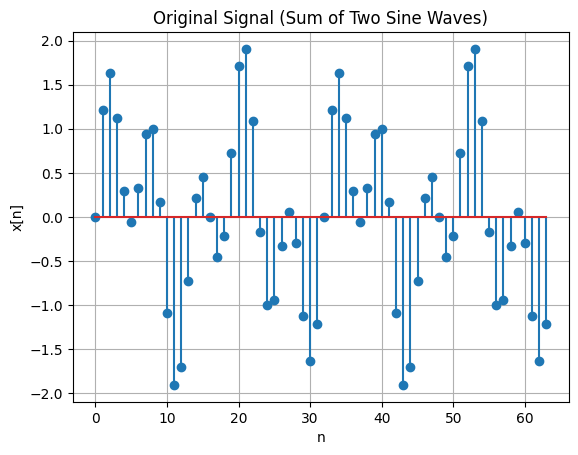

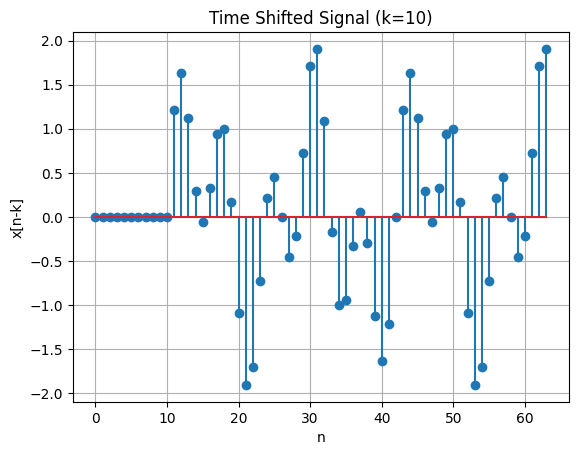

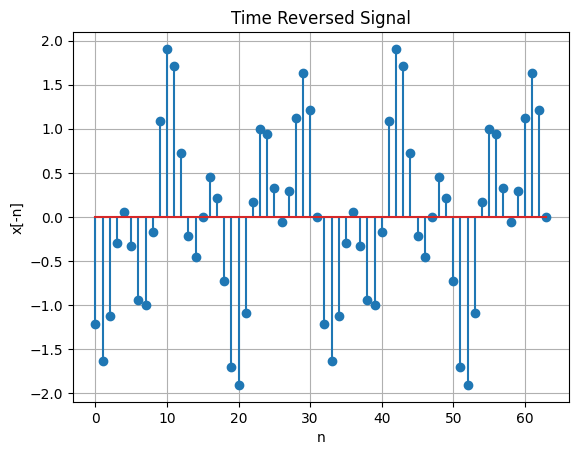

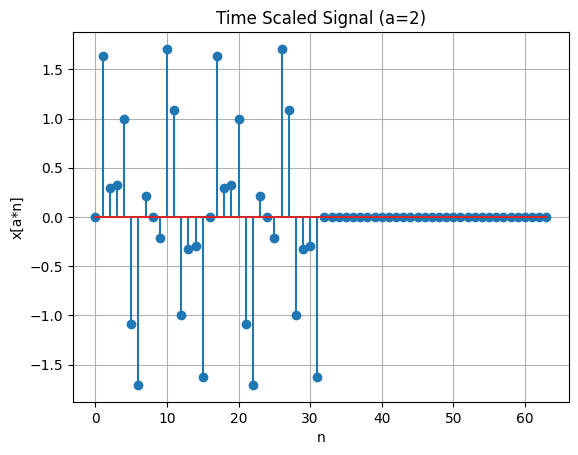

In [ ]:
N = 64  # Number of samples


# Generate a signal with two frequency components
x1 = generate_sine_wave(N, 4)
x2 = generate_sine_wave(N, 10)
x = x1 + x2
SignalPlotter.plot_time_domain(x, 'Original Signal (Sum of Two Sine Waves)')

# Time Shifting
k = 10
x_shifted = time_shift(x, k)
SignalPlotter.plot_time_domain(
    x_shifted, f'Time Shifted Signal (k={k})', yLable='x[n-k]')

# Time Reversal
x_reversed = time_reverse(x)
SignalPlotter.plot_time_domain(
    x_reversed, 'Time Reversed Signal', yLable='x[-n]')

# Time Scaling
a = 2
x_scaled = time_scale(x, a)
SignalPlotter.plot_time_domain(
    x_scaled, f'Time Scaled Signal (a={a})', yLable='x[a*n]')

## Question 3
> 3 Discrete Fourier Transform (DFT)

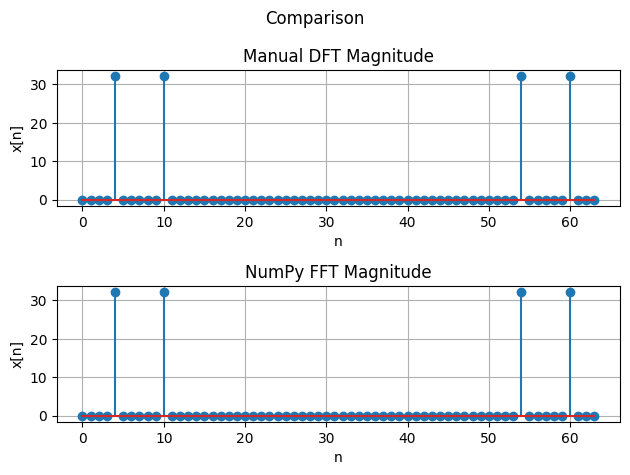

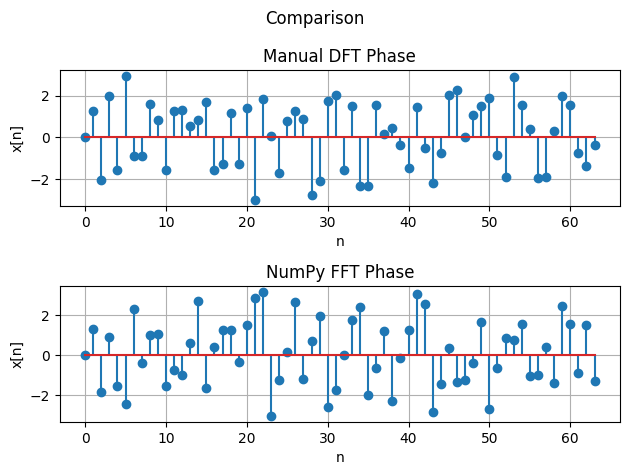

In [ ]:
# Manual DFT
start = time.time()
dft_manual = manual_dft(x)
manual_time = time.time() - start

# NumPy FFT
start = time.time()
dft_numpy = numpy_fft(x)
fft_time = time.time() - start

# Plot comparison
SignalPlotter.plot_comparison(np.abs(dft_manual), np.abs(
    dft_numpy), 'Manual DFT Magnitude', 'NumPy FFT Magnitude')
SignalPlotter.plot_comparison(np.angle(dft_manual), np.angle(
    dft_numpy), 'Manual DFT Phase', 'NumPy FFT Phase')

## Question 4
> 4 Discrete-Time Fourier Transform (DTFT)

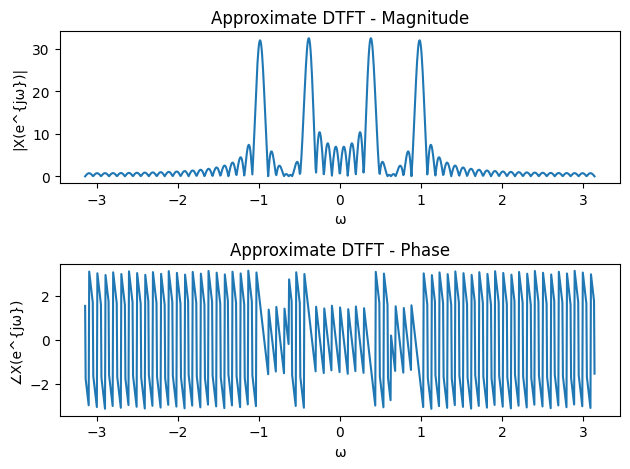

In [93]:
omega = np.linspace(-np.pi, np.pi, 1000)
dtft = approximate_dtft(x, omega)
SignalPlotter.plot_dtft(omega, dtft, 'Approximate DTFT')

## Question 5
> 5 FFT Efficiency Comparison

In [94]:
print(f"Manual DFT Execution Time: {manual_time:.6f} seconds")
print(f"NumPy FFT Execution Time: {fft_time:.6f} seconds")

Manual DFT Execution Time: 0.006135 seconds
NumPy FFT Execution Time: 0.000094 seconds


## Question 6
> 6 Filtering in the Frequency Domain

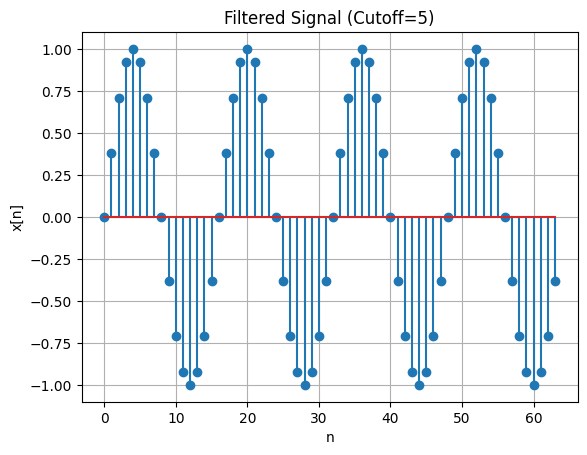

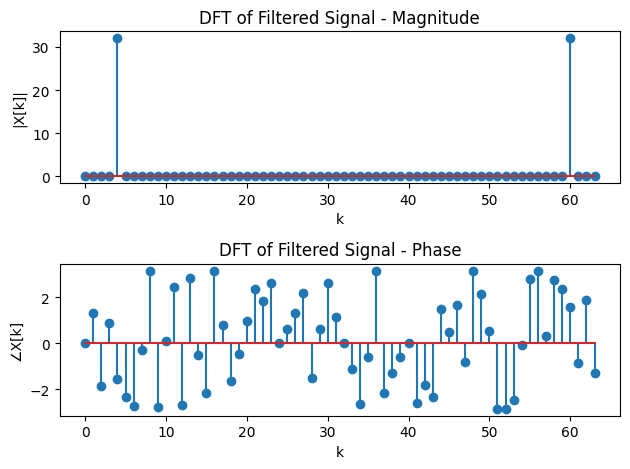

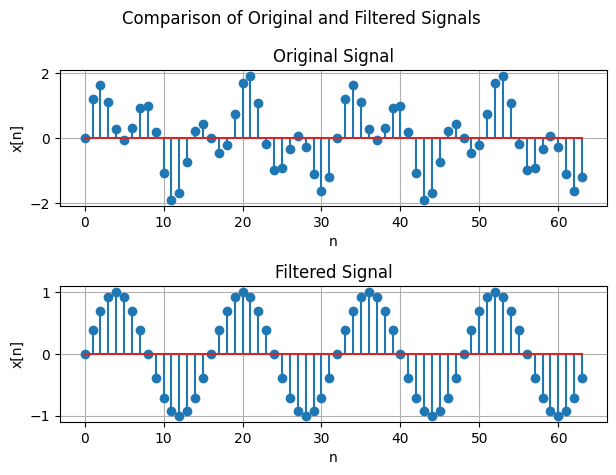

In [ ]:
cutoff = 5  # Cutoff frequency index
x_filtered = apply_low_pass_filter(x, cutoff)
SignalPlotter.plot_time_domain(
    x_filtered, f'Filtered Signal (Cutoff={cutoff})')

# DFT of filtered signal to show frequency domain effect
dft_filtered = numpy_fft(x_filtered)
SignalPlotter.plot_dft(dft_filtered, 'DFT of Filtered Signal')

# Comparison of original and filtered signals
SignalPlotter.plot_comparison(x, x_filtered, 'Original Signal', 'Filtered Signal',
                              'Comparison of Original and Filtered Signals')